<a href="https://colab.research.google.com/github/Kunaltembhare003/EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. 

#**Data** <br>
This dataset has around 48894 observation in it with 16 colums(numerical and catagoriacal value).



In [161]:
pip install geopandas


In [278]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import point, polygon
from wordcloud import WordCloud

%matplotlib inline



**Aquaring and loading data** <br>
Loding a data into appropriate format for analysis. 

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
working_path = '/content/drive/MyDrive/alma_better/capstone_project/EDA/'


In [165]:
df = pd.read_csv(working_path+'Airbnb_NYC_2019.csv')
df.head(4)

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194

[4 rows x 16 columns]

In [166]:
#checking basic information about dataset  like number of colums and rows, data type total number of nullll value. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After loading dataset and from looking of head and info of data. we can see number of things.
1. NaN value  
2. most number of NaN value present in last_review and 'review per_month' colum 
3. dataset divided into numerical and catogorical datatype.
4. 48895 rows and 16 colums 

we need to do data cleaning data and it must tp handle NaN  value before data exploration.





#**Data cleaing and wrangling**


after looking into dataset, column 'id','name', 'last_review' is irrelevent for to our data analysis. missing value does not need special treatment. column 'reviews_per_month' has ~10,000 NaN value which can be converted into 0.0.

In [167]:
#drooping columns 
df.drop(['id','last_review'], axis=1, inplace=True)
df.head(3)

name  ...  availability_365
0   Clean & quiet apt home by the park  ...               365
1                Skylit Midtown Castle  ...               355
2  THE VILLAGE OF HARLEM....NEW YORK !  ...               365

[3 rows x 14 columns]

In [168]:
#converting all NaN value to zero.
df.fillna(0,inplace=True)
df.head(3)

name  ...  availability_365
0   Clean & quiet apt home by the park  ...               365
1                Skylit Midtown Castle  ...               355
2  THE VILLAGE OF HARLEM....NEW YORK !  ...               365

[3 rows x 14 columns]

number of listed properties which available for zero days can be drop. As we assuming, they delisted there properties.
  

In [169]:
##remove rows where price is zero &avalibaility_365==0
df_del = df[(df['price']==0) | (df['availability_365']==0)].index   
##remove rows where avalibaility_365==0
df.drop(df_del,inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            31354 non-null  object 
 1   host_id                         31354 non-null  int64  
 2   host_name                       31354 non-null  object 
 3   neighbourhood_group             31354 non-null  object 
 4   neighbourhood                   31354 non-null  object 
 5   latitude                        31354 non-null  float64
 6   longitude                       31354 non-null  float64
 7   room_type                       31354 non-null  object 
 8   price                           31354 non-null  int64  
 9   minimum_nights                  31354 non-null  int64  
 10  number_of_reviews               31354 non-null  int64  
 11  reviews_per_month               31354 non-null  float64
 12  calculated_host_listings_count  

number of neighboorhood group and neighbourhood are listed 

In [171]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [172]:
#number of neighbourhood listed?
len(df['neighbourhood'].unique())

218

In [173]:
#number of types of room listed
df['room_type'].value_counts()

Entire home/apt    16532
Private room       13960
Shared room          862
Name: room_type, dtype: int64

set figure size

In [217]:
#set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

#data visuvalization

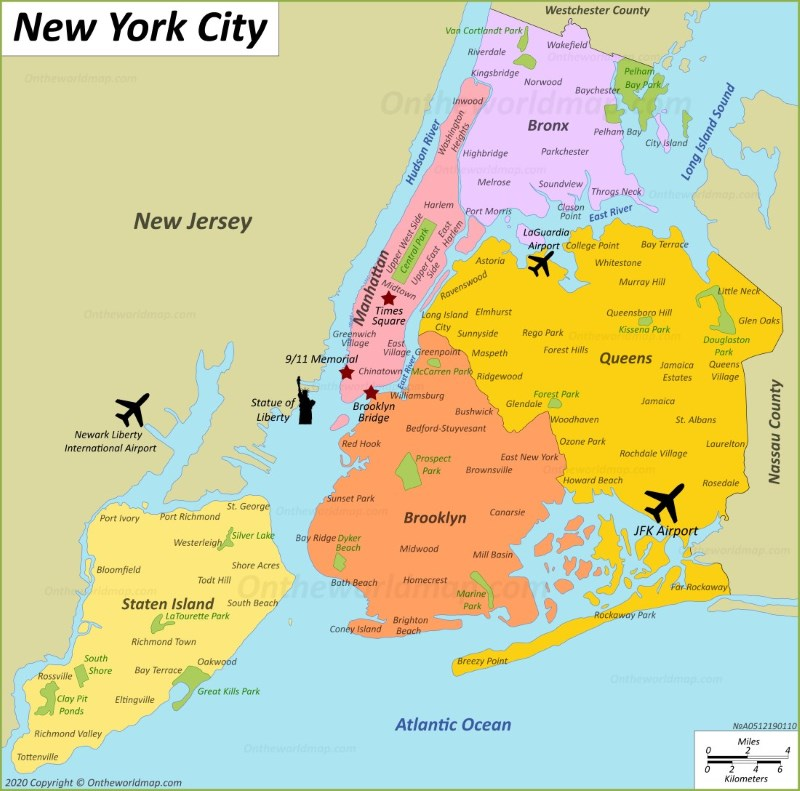

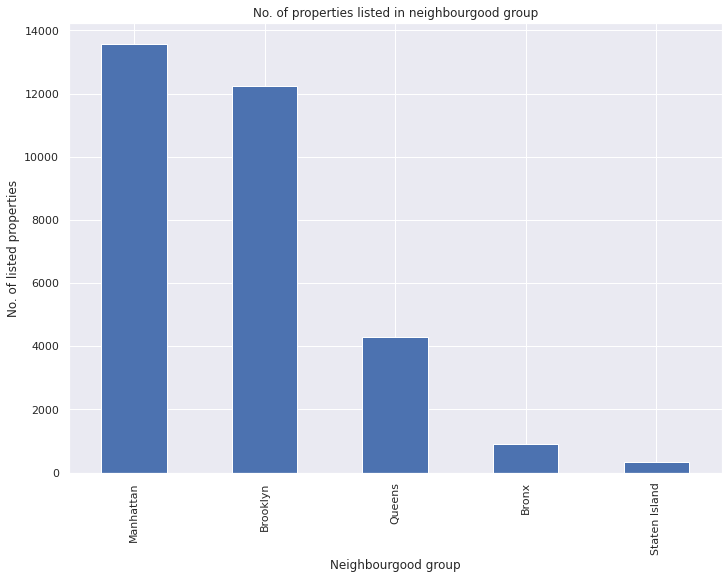

In [175]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('No. of properties listed in neighbourgood group')
plt.xlabel('Neighbourgood group')
plt.ylabel('No. of listed properties')
plt.show()

In [176]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

neighbourhood_group  price
0               Bronx   2500
1            Brooklyn   8000
2           Manhattan  10000
3              Queens   2600
4       Staten Island   5000

top planning areas


Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

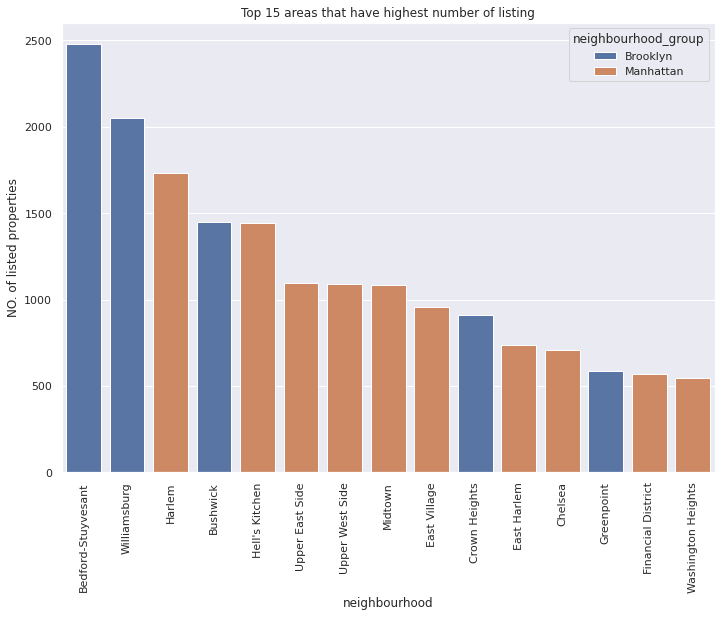

In [177]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

#minimum and maximum price neighbourhood wise

In [ ]:
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].median().reset_index()

##find out number of airbnb acomodation facility at neighboorhood of **manhattan** 

###find out number of airbnb acomodation facility at neighboorhood of manhattan

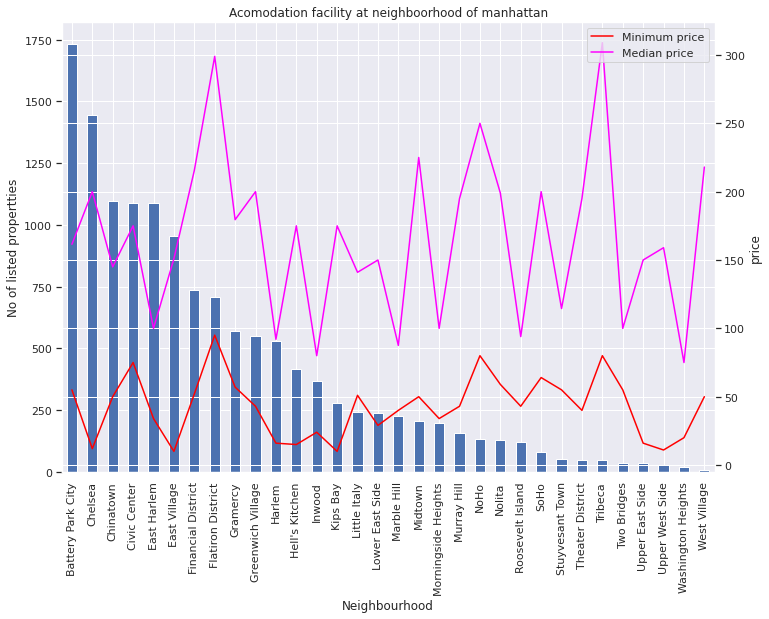

Number of neighborhoods in Manhattan where rental housing is listed: 32


In [238]:
man_data = df[df['neighbourhood_group'] == 'Manhattan']
man_ax1 = man_data['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation facility at neighboorhood of manhattan')
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Manhattan'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Manhattan'])
plt.legend(loc='upper right') #set legend position
plt.title('')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing is listed: {man_data["neighbourhood"].nunique()}')



###find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **private room**


---



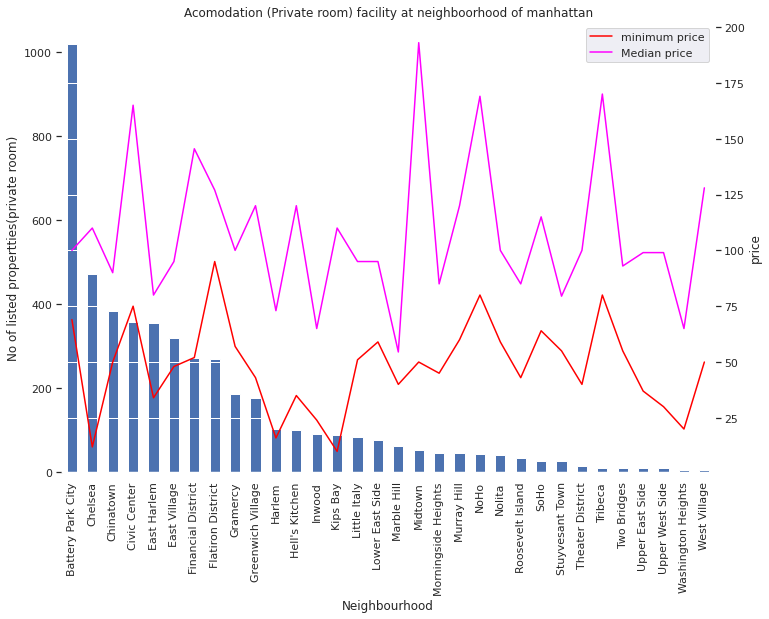

Number of neighborhoods in Manhattan where rental housing (private room) is listed: 32


In [242]:
#plt.rcParams['axes.facecolor'] = 'skyblue'
pri_room = man_data[man_data['room_type']=='Private room']
man_ax1 = pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
man_ax1.set_facecolor('xkcd:white')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (private room) is listed: {pri_room["neighbourhood"].nunique()}')


###find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Entire home/apt**

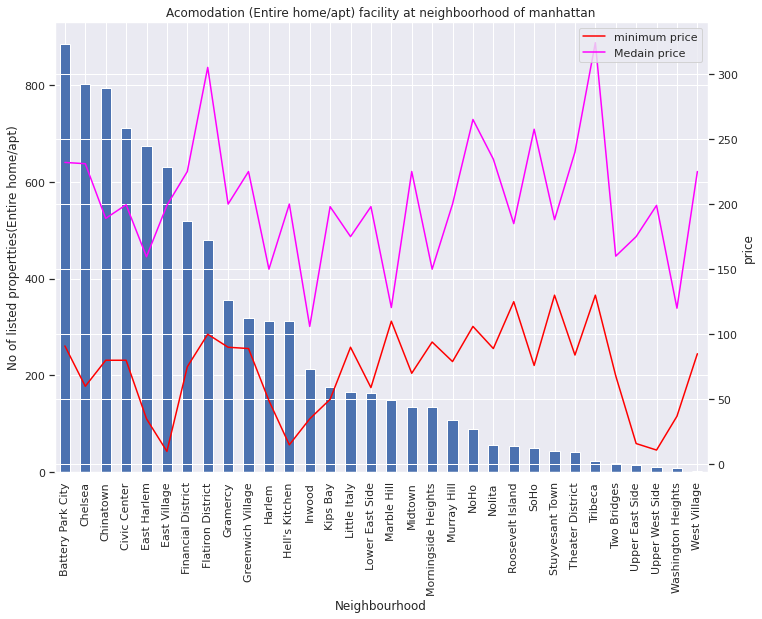

Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: 32


In [243]:
apt_room = man_data[man_data['room_type']=='Entire home/apt']
man_ax1 = apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of manhattan')
                                                     
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Medain price',
             data=apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: {apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Shared room**

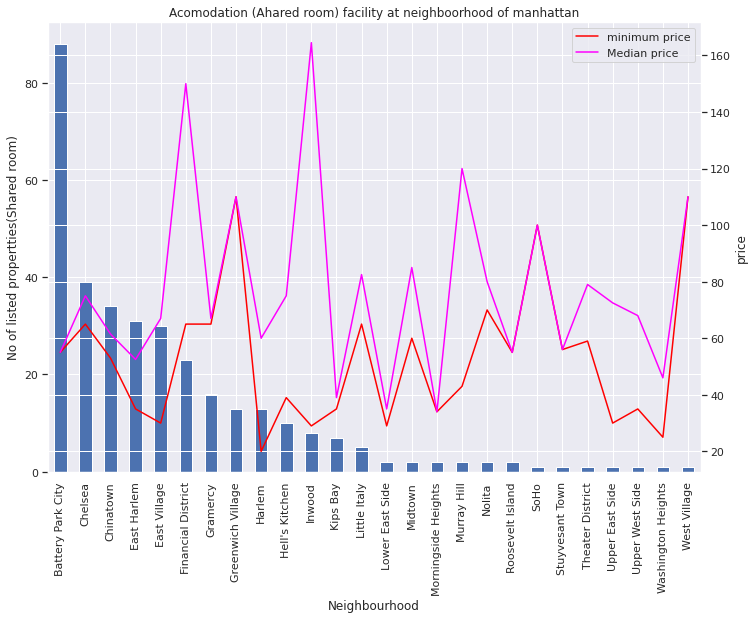

Number of neighborhoods in Manhattan where rental housing (shared room) is listed: 26


In [245]:
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Ahared room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (shared room) is listed: {shr_room["neighbourhood"].nunique()}')

##find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** 

###find out number of airbnb acomodation facility at neighboorhood of Brooklyn

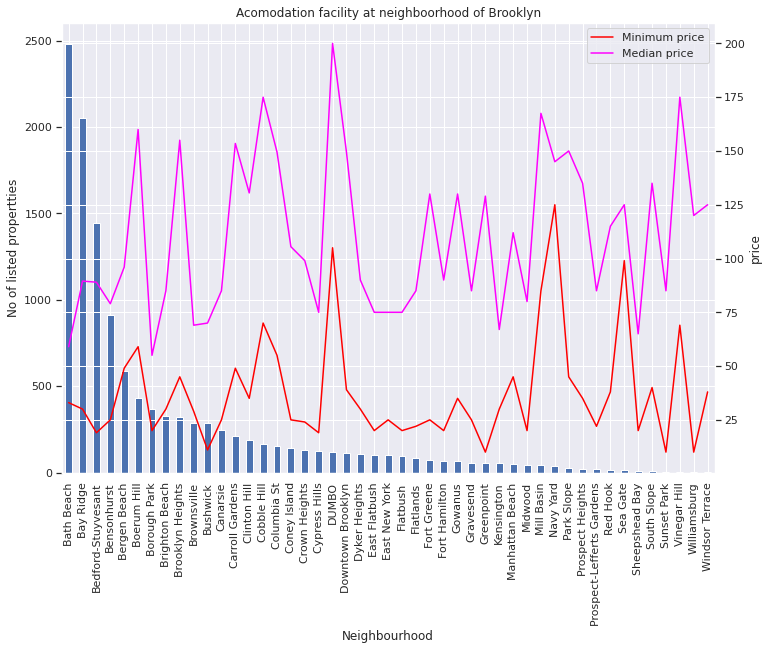

Number of neighborhoods in Brooklyn where rental housing is listed: 47


In [247]:
brooklyn_data = df[df['neighbourhood_group'] == 'Brooklyn']
sns.set(rc={'figure.figsize':(11.7,8.27)})
bro_ax1 =brooklyn_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Brooklyn')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Brooklyn'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Brooklyn'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing is listed: {brooklyn_data["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room  type **private room**

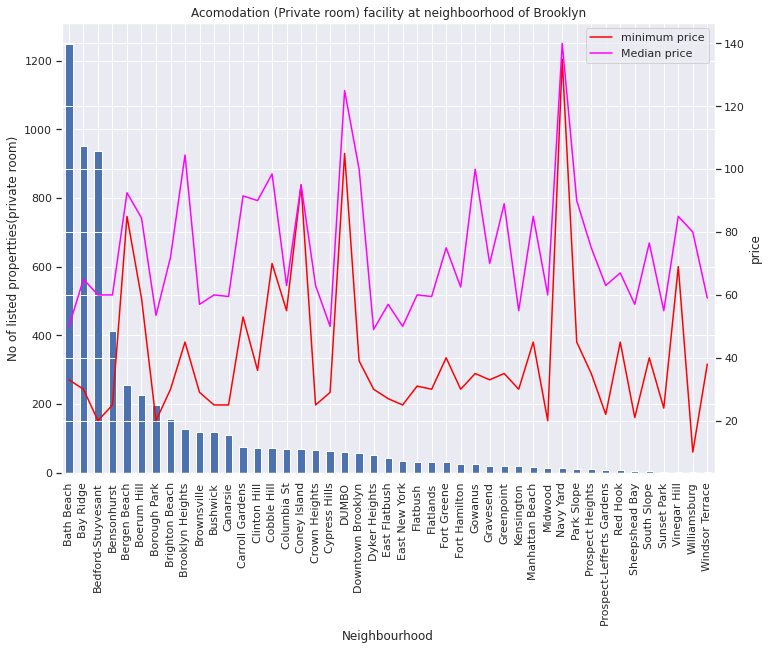

Number of neighborhoods in Brooklyn where rental housing (private room) is listed: 45


In [248]:
b_pri_room = brooklyn_data[brooklyn_data['room_type']=='Private room']
bro_ax1 = b_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Brooklyn')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (private room) is listed: {b_pri_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room type **entire apt**

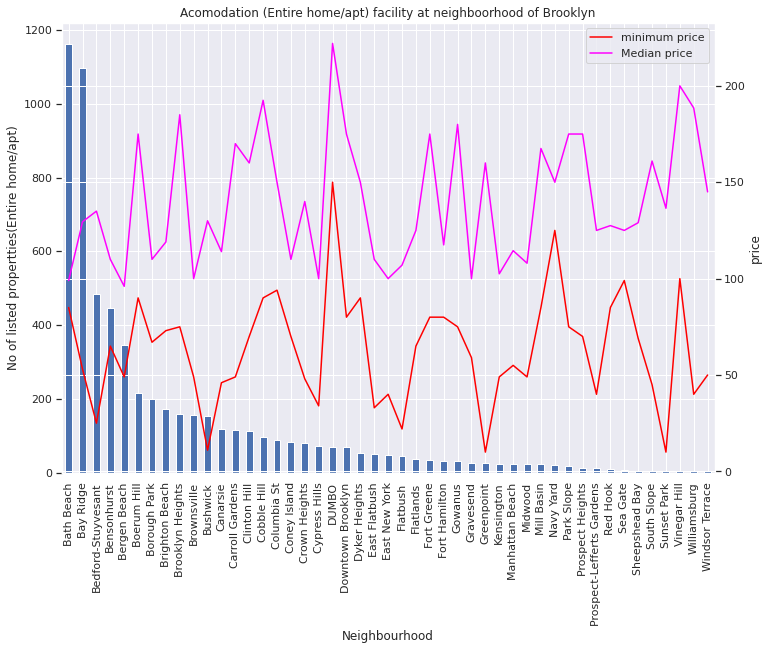

Number of neighborhoods in Brooklyn where rental housing (entire home/apt) is listed: 47


In [250]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Entire home/apt']
man_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Brooklyn')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (entire home/apt) is listed: {b_apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room type **shared room**

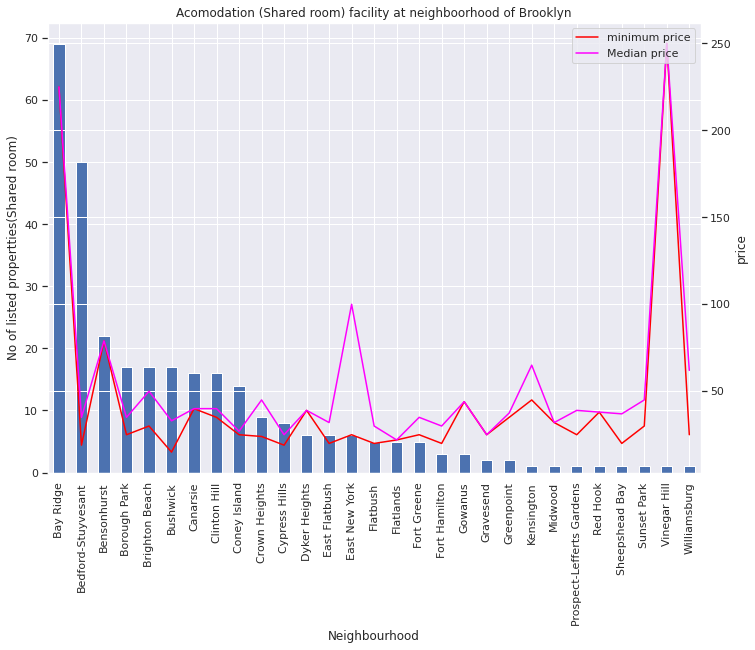

Number of neighborhoods in Brooklyn where rental housing (shared room) is listed: 29


In [252]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Shared room']
bro_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Brooklyn')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Brooklyn where rental housing (shared room) is listed: {b_shr_room["neighbourhood"].nunique()}')

#find out number of airbnb acomodation facility at neighboorhood of **Queens** 

###find out number of airbnb acomodation facility at neighboorhood of Queens

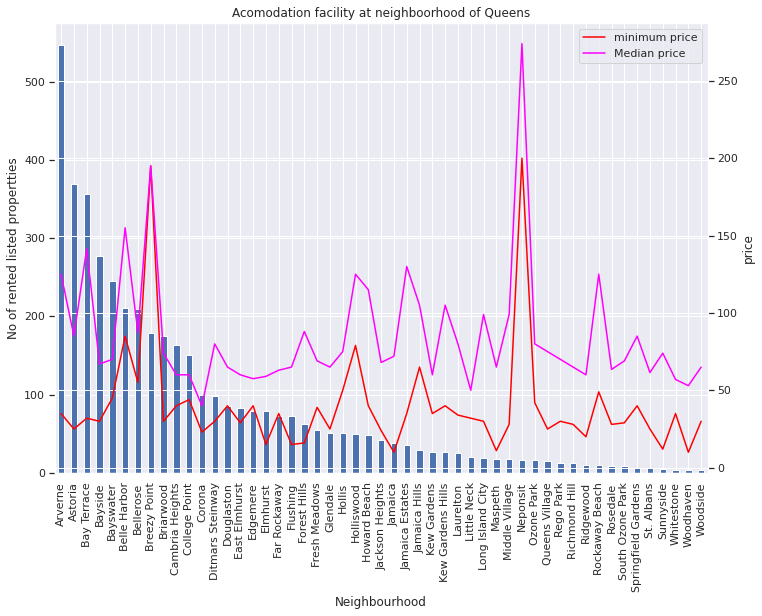

Number of neighborhoods in Queens where rental housing is listed: 51


In [253]:
Queens_data = df[df['neighbourhood_group'] == 'Queens']
sns.set(rc={'figure.figsize':(11.7,8.27)})
que_ax1 = Queens_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Queens'])"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Queens'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing is listed: {Queens_data["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **private room**

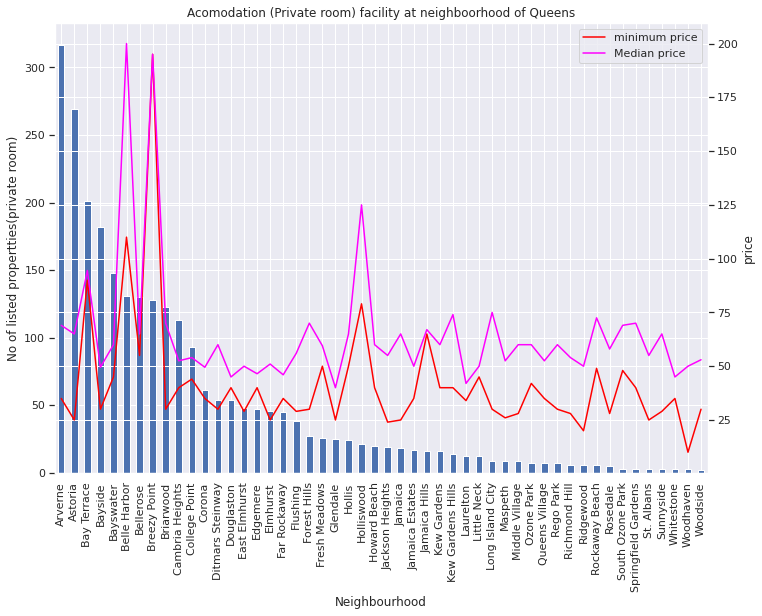

Number of neighborhoods in Queens where rental housing (private room) is listed: 50


In [255]:
queens_pri_room = Queens_data[Queens_data['room_type']=='Private room']
que_ax1 = queens_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (private room) is listed: {queens_pri_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **Entire home/apt**

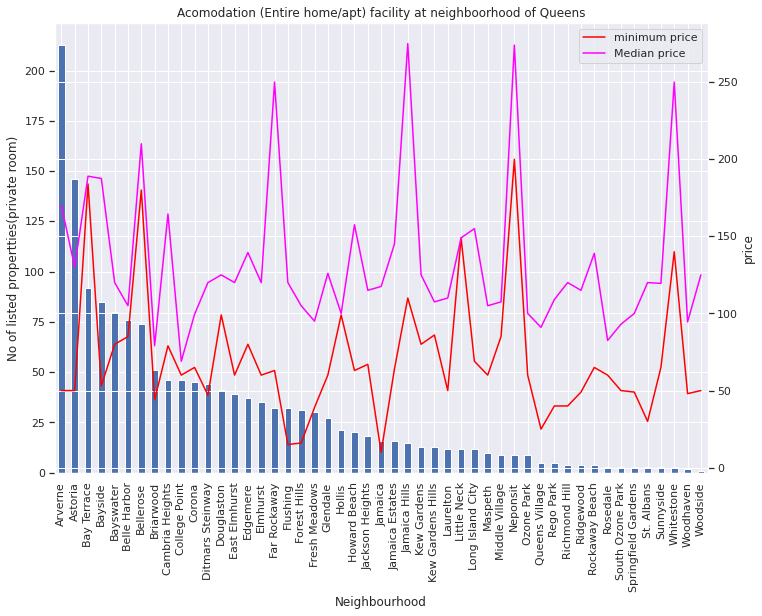

Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: 49


In [256]:
queens_ent_room = Queens_data[Queens_data['room_type']=='Entire home/apt']
que_ax1 = queens_ent_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: {queens_ent_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **Shared room**

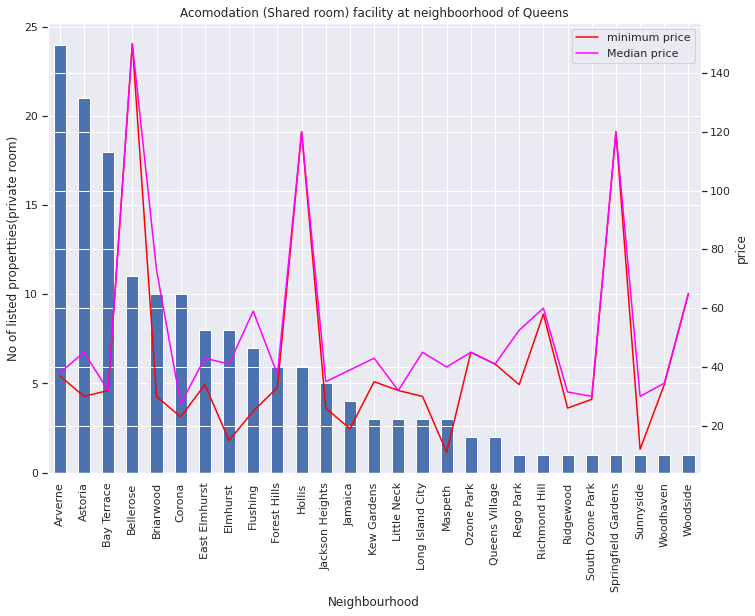

Number of neighborhoods in Queens where rental housing (shared room) is listed: 27


In [258]:
queens_shr_room = Queens_data[Queens_data['room_type']== 'Shared room']
que_ax1 = queens_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (shared room) is listed: {queens_shr_room["neighbourhood"].nunique()}')

#find out number of airbnb acomodation facility at neighboorhood of **Bronx** 

###find out number of airbnb acomodation facility at neighboorhood of Bronx

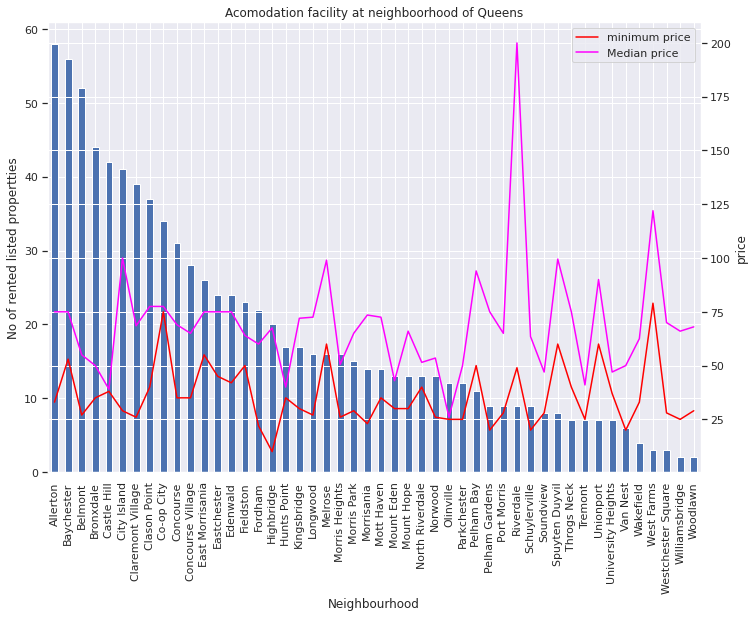

Number of neighborhoods in Bronx where rental housing is listed: 48


In [259]:
bronx_data = df[df['neighbourhood_group'] == 'Bronx']
bro_ax1 = bronx_data['neighbourhood'].value_counts().plot(kind="bar",
                                                          ylabel='No of rented listed propertties',
                                                          xlabel='Neighbourhood',
                                                          title='Acomodation facility at neighboorhood of Queens')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Bronx'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Bronx'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing is listed: {bronx_data["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **private room**

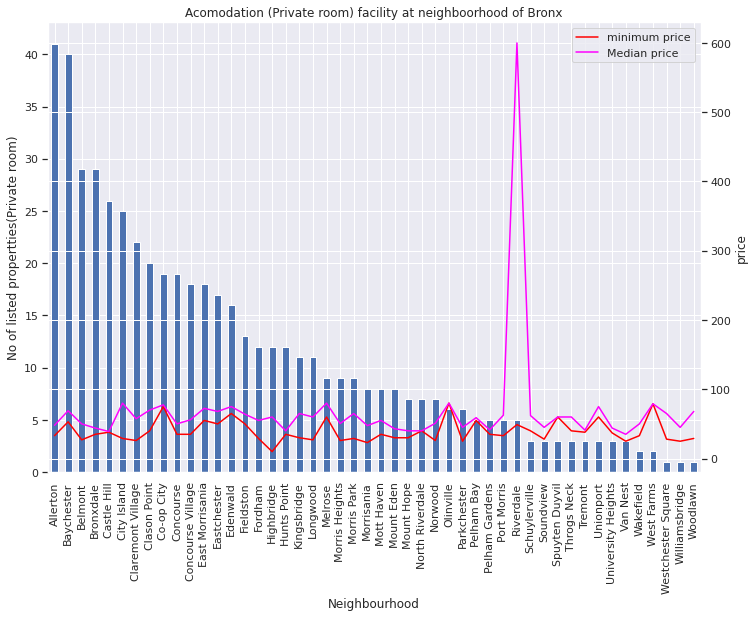

Number of neighborhoods in Bronx where rental housing (private room) is listed: 48


In [260]:
bronx_pri_room = bronx_data[bronx_data['room_type']=='Private room']
bronx_ax1 =bronx_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (private room) is listed: {bronx_pri_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **Entire apt**

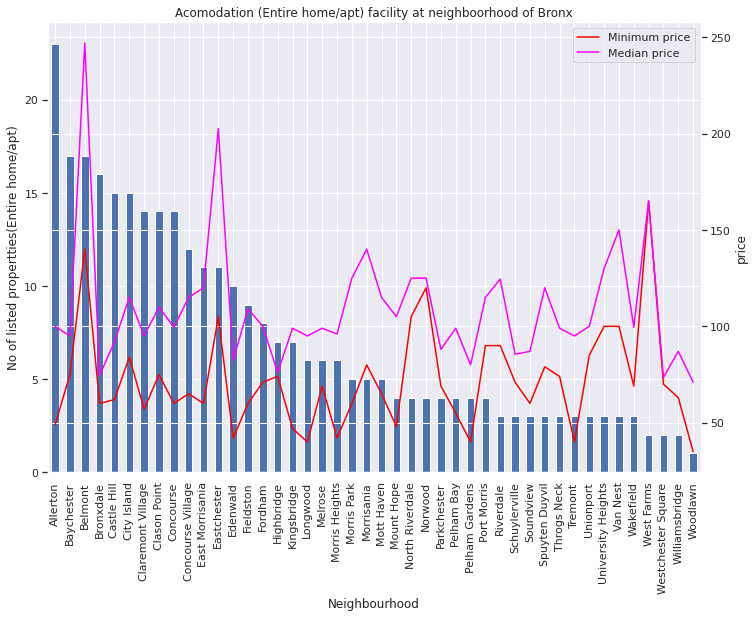

Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: 44


In [261]:
bronx_apt_room = bronx_data[bronx_data['room_type']=='Entire home/apt']
bro_ax1 =bronx_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Bronx')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: {bronx_apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Bromx** depend on room type **shared room**

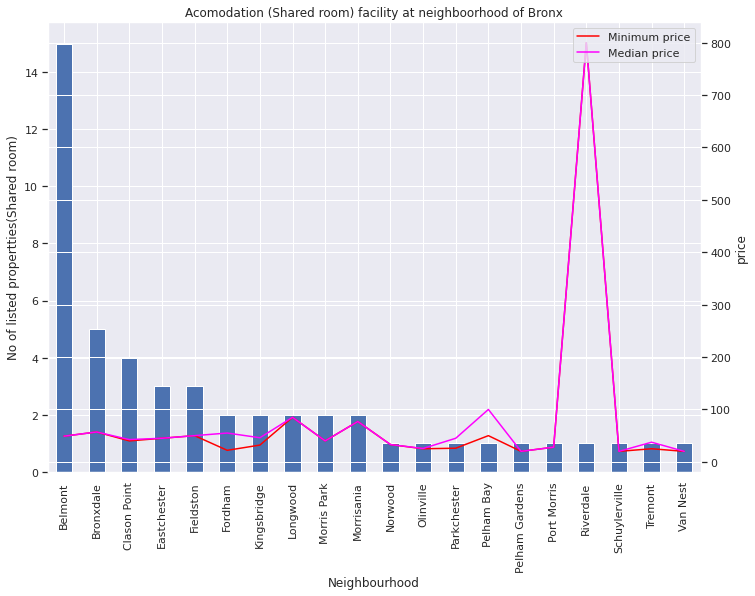

Number of neighborhoods in Bronx where rental housing (shared room) is listed: 20


In [262]:
bronx_shr_room = bronx_data[bronx_data['room_type']=='Shared room']
bronx_ax1 =bronx_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                               ylabel='No of listed propertties(Shared room)',
                                                               xlabel='Neighbourhood',
                                                               title='Acomodation (Shared room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='Maximum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (shared room) is listed: {bronx_shr_room["neighbourhood"].nunique()}')

#find out number of airbnb acomodation facility at neighboorhood of **Staten Island** 

###find out number of airbnb acomodation facility at neighboorhood of Staten Island

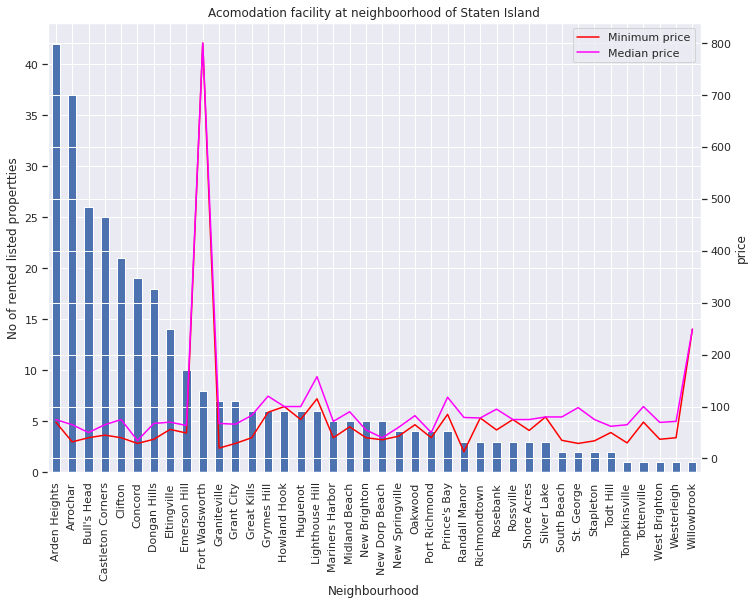

Number of neighborhoods in Staten Island where rental housing is listed: 40


In [263]:
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Staten Island')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='Maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing is listed: {staten_is_data["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Staten Island** depend on room type **Private room**

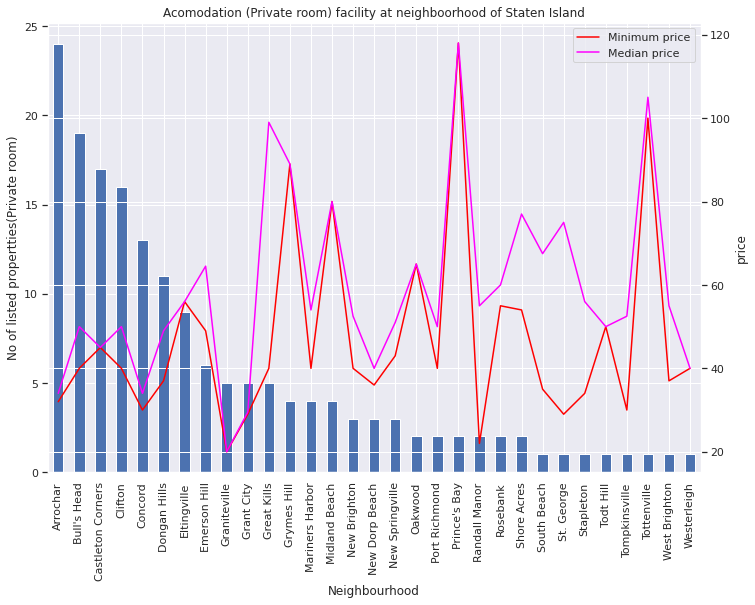

Number of neighborhoods in Staten Island where rental housing (private room) is listed: 31


In [265]:
staten_pri_room = staten_is_data[staten_is_data['room_type']=='Private room']
staten_ax1 =staten_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (private room) is listed: {staten_pri_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Staten Island** depend on room type **Entire home/apt**

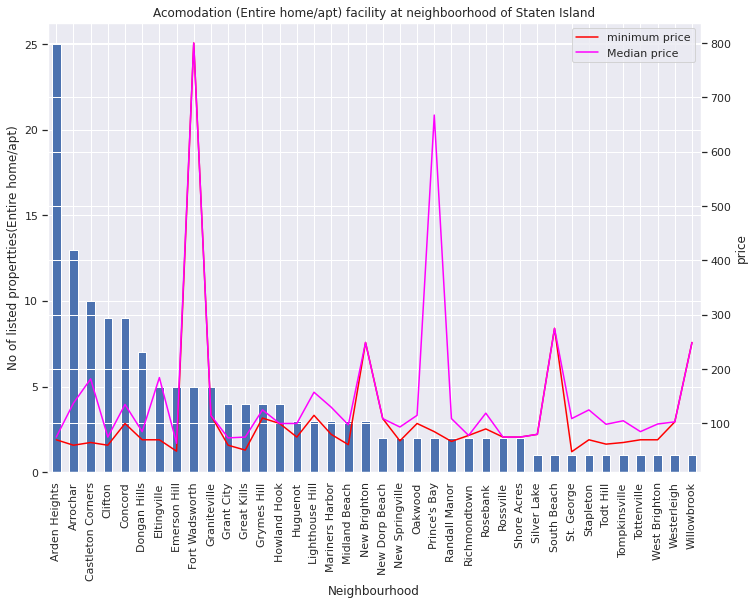

Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: 38


In [266]:
staten_apt_room = staten_is_data[staten_is_data['room_type']=='Entire home/apt']
staten_ax1 =staten_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: {staten_apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Staten Island** depend on room type **Shared room**

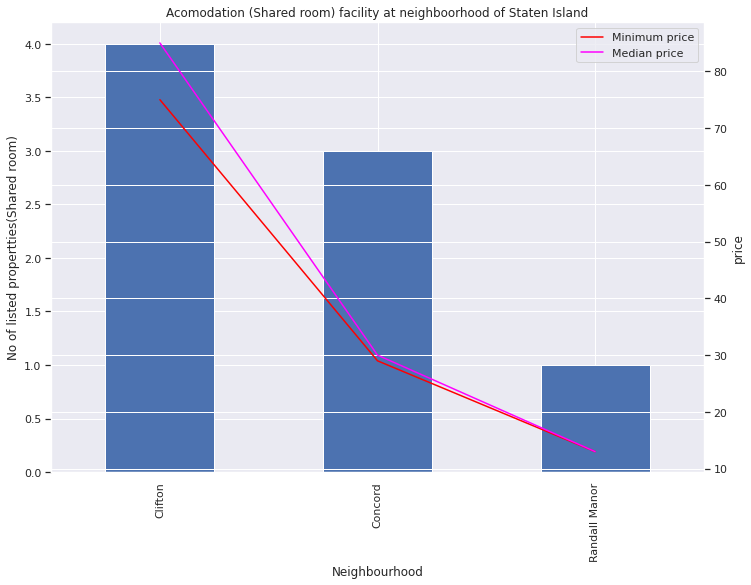

Number of neighborhoods in Staten Island where rental housing (shared room) is listed: 3


In [267]:
staten_shr_room = staten_is_data[staten_is_data['room_type']=='Shared room']
staten_ax1 =staten_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (shared room) is listed: {staten_shr_room["neighbourhood"].nunique()}')

#buisest host

In [194]:
#df.groupby(['availability_365','reviews_per_month']) and df['availability_365'>= 100]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
av_365 = df.loc[~((df['availability_365'] <= 200) | (df['calculated_host_listings_count']<=50)| (df['reviews_per_month'] == 0))].reset_index()
av_365=av_365.groupby(["host_id",'host_name','calculated_host_listings_count'],as_index=False)['reviews_per_month','availability_365'].mean()
av_365.sort_values(['calculated_host_listings_count'],ascending=False,inplace=True)
av_365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


host_id          host_name  ...  reviews_per_month  availability_365
10  219517861       Sonder (NYC)  ...           1.992514        311.267760
7   107434423         Blueground  ...           0.216667        295.041667
5    30283594               Kara  ...           0.091111        345.555556
8   137358866             Kazuya  ...           0.443684        241.473684
2    12243051             Sonder  ...           0.304074        306.000000
3    16098958     Jeremy & Laura  ...           0.122456        309.912281
6    61391963  Corporate Housing  ...           0.297255        313.039216
4    22541573                Ken  ...           0.113333        337.111111
9   200380610            Pranjal  ...           1.000000        342.000000
0     1475015               Mike  ...           0.088780        340.341463
1     7503643               Vida  ...           0.099535        328.744186

[11 rows x 5 columns]

In [195]:
av_365.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 10 to 1
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         11 non-null     int64  
 1   host_name                       11 non-null     object 
 2   calculated_host_listings_count  11 non-null     int64  
 3   reviews_per_month               11 non-null     float64
 4   availability_365                11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 528.0+ bytes


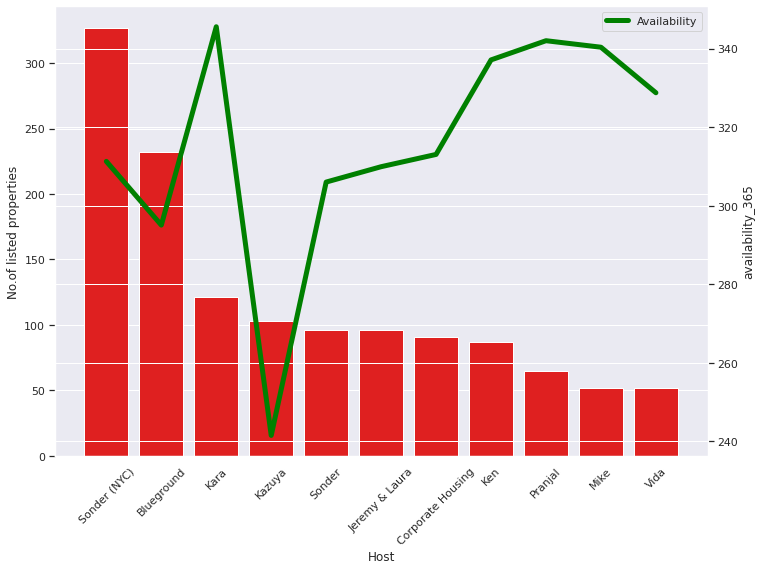

In [196]:

sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_ava = sns.barplot(x="host_name",
                 y="calculated_host_listings_count", 
                 data=av_365,color="red")

ax_ava.set(ylabel="No.of listed properties",
           xlabel="Host")
plt.xticks(rotation=45)

ax2_ava = ax_ava.twinx() # create axis 2 for prrice listing
ax2_ava = sns.lineplot(x='host_name', 
             y='availability_365',
             color='green',
             label='Availability',
             linewidth=5,
             data=av_365)
ax2_ava.legend(ncol=2, 
               loc="upper right")
plt.show()

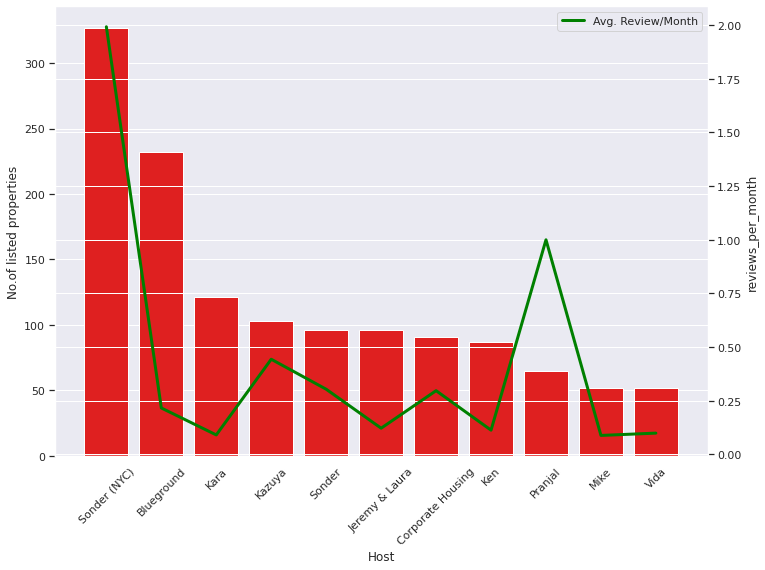

In [197]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_rev = sns.barplot(x="host_name",
                 y="calculated_host_listings_count",
                 data=av_365,color="red")
plt.xticks(rotation=45)

ax_rev.set(ylabel="No.of listed properties",
       xlabel="Host")
ax2_rev = ax_rev.twinx() # create axis 2 for reviews_per_month

ax2_rev = sns.lineplot(x='host_name', 
             y='reviews_per_month',
             color='green',
             label='Avg. Review/Month',
             lw=3,
             data=av_365)
ax2_rev.legend(ncol=2, loc="upper right")
plt.show()

#geo map 

In [198]:
#to create price heat map on map we can use latitude and longitude
listing = df.loc[:,['longitude','latitude','price','availability_365']]
listing.head(3)

longitude  latitude  price  availability_365
0  -73.97237  40.64749    149               365
1  -73.98377  40.75362    225               355
2  -73.94190  40.80902    150               365

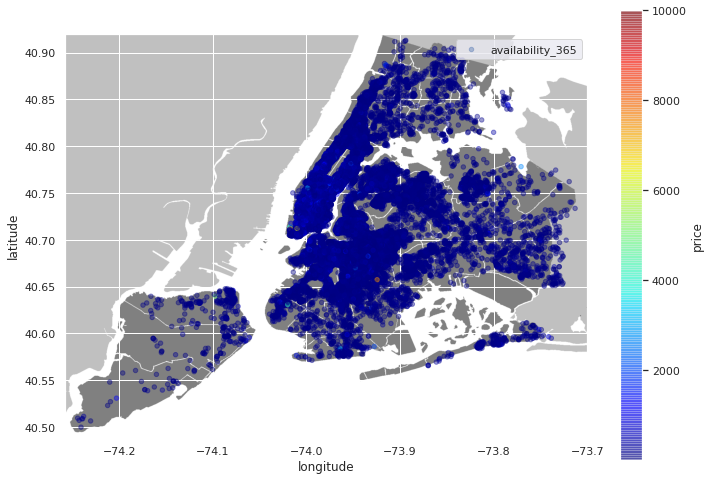

In [199]:
import urllib
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
listing.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

Now we can see how the listings are plotted into a map. For a better understanding of the listings density, we can use the folium heat map

In [200]:


import folium
from folium.plugins import HeatMap
from folium import plugins



In [201]:
map_NYC = folium.Map([40.80902,-73.94190],zoom_start=7)

In [202]:
station = df[['latitude','longitude']]
# convert to (n, 2) nd-array format for heatmap
stationArr = station.values

# plot heatmap
map_NYC.add_child(plugins.HeatMap(stationArr, radius=15))
map_NYC

In [203]:
df.head()

name  ...  availability_365
0         Clean & quiet apt home by the park  ...               365
1                      Skylit Midtown Castle  ...               355
2        THE VILLAGE OF HARLEM....NEW YORK !  ...               365
3            Cozy Entire Floor of Brownstone  ...               194
5  Large Cozy 1 BR Apartment In Midtown East  ...               129

[5 rows x 14 columns]

In [204]:
## if we have higher min nights does that mean price per night will be less     
df.groupby(['room_type','minimum_nights'])

In [205]:
minimum_night_price = df.groupby(['room_type','minimum_nights'],as_index=False)['price'].median()
minimum_night_price.loc[~(minimum_night_price['minimum_nights'] == 999)] 

room_type  minimum_nights  price
0    Entire home/apt               1  160.0
1    Entire home/apt               2  175.0
2    Entire home/apt               3  175.0
3    Entire home/apt               4  179.0
4    Entire home/apt               5  175.0
..               ...             ...    ...
165      Shared room              27  337.0
166      Shared room              30   35.0
167      Shared room              31   29.5
168      Shared room              90   25.0
169      Shared room             100   33.0

[168 rows x 3 columns]

In [206]:
minimum_night_price.describe()

minimum_nights        price
count      171.000000   171.000000
mean       112.660819   156.500000
std        196.026354   492.939699
min          1.000000    25.000000
25%         16.500000    56.750000
50%         37.000000    95.000000
75%        114.500000   145.750000
max       1250.000000  5039.000000

#availability 365 is proportional to review per month

In [207]:
av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
av_df.loc[~(df==0).all(axis=1)]365_rew.head(3)

index  ... availability_365
0      0  ...              365
1      1  ...              355
2      3  ...              194

[3 rows x 15 columns]

In [208]:
av_365_rew=av_365_rew.loc[:,['neighbourhood_group',"neighbourhood",'room_type','reviews_per_month','availability_365']]
av_365_rew.head(3)

neighbourhood_group neighbourhood  ... reviews_per_month  availability_365
0            Brooklyn    Kensington  ...              0.21               365
1           Manhattan       Midtown  ...              0.38               355
2            Brooklyn  Clinton Hill  ...              4.64               194

[3 rows x 5 columns]

In [209]:
av_365_rewi=av_365_rew.groupby(['neighbourhood_group','room_type','availability_365'])['reviews_per_month'].mean().reset_index()
av_365_rewi[av_365_rewi['room_type']=='Private room']

neighbourhood_group     room_type  availability_365  reviews_per_month
187                Bronx  Private room                 1             1.3575
188                Bronx  Private room                 2             1.0000
189                Bronx  Private room                 3             1.3400
190                Bronx  Private room                 5             3.3900
191                Bronx  Private room                 6             2.1000
...                  ...           ...               ...                ...
3120       Staten Island  Private room               360             1.9250
3121       Staten Island  Private room               362             1.1700
3122       Staten Island  Private room               363             3.0875
3123       Staten Island  Private room               364             1.0000
3124       Staten Island  Private room               365             1.7550

[1394 rows x 4 columns]

In [210]:
av_365_req3 = av_365_rewi.loc[((av_365_rewi['neighbourhood_group']=='Bronx') & (av_365_rewi['room_type']=='Entire home/apt'))]
#av_365_req3.plot(x='availability_365',y='reviews_per_month',kind="bar")
#plt.xlabel('availability_365')
#plt.ylabel('review_per_month')
#plt.show()

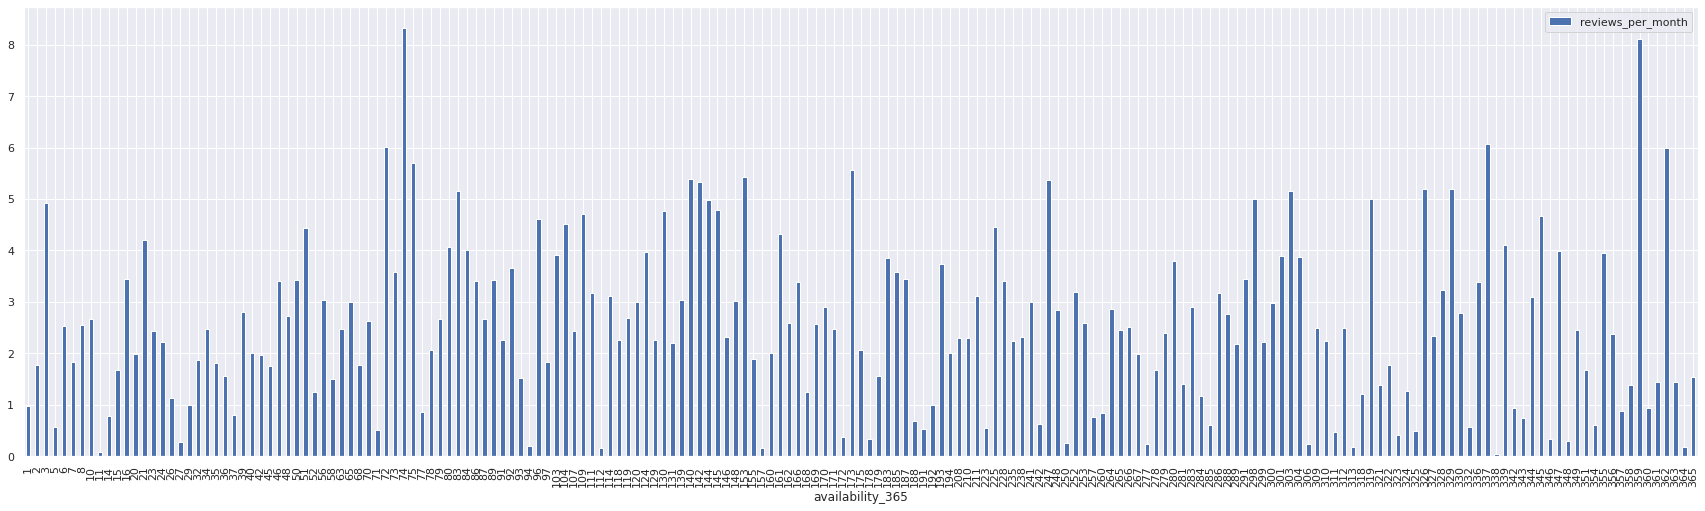

In [211]:
sns.set(rc={'figure.figsize':(30,8.27)}) 
av_365_req3.plot(x='availability_365',y='reviews_per_month',kind='bar',style='o') #for entire hoem/apt at bronx
plt.show()

# word used to attract people

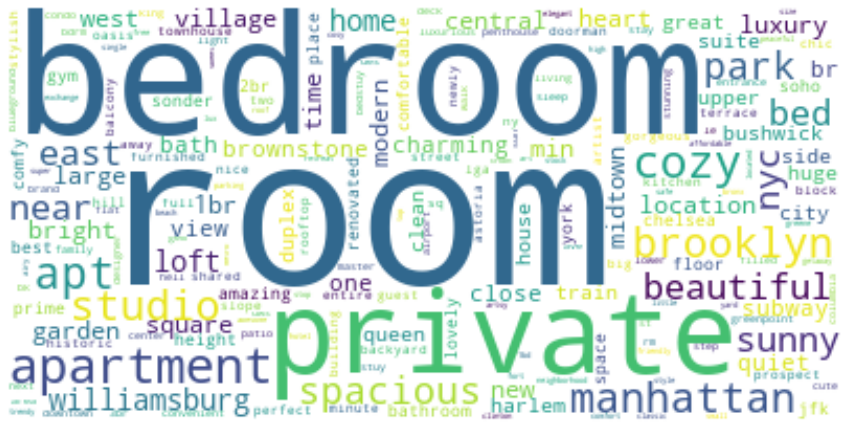

In [282]:
#Creating the text variable
df_name = df[df['name']!=0]
text = " ".join(name for name in df_name.name)
text=text.lower()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
sns.set(rc={'figure.figsize':(15,11)})
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()